# Evaluate the Transfer Learning
**This tutorial was created using alphaDIA 1.8.1 - please be aware that there might be changes in your version.**

## 1. Prerequisites
The information on the training of a PeptDeep model is stored in the `stats.train.tsv` file.
We will be using the stats file from the dimethyl transfer learning example. You can download the file [here](https://datashare.biochem.mpg.de/s/RoyN2tUlPitJjh4) or use the file included in your alphaDIA output directory. Make sure you have python with pandas and seaborn installed.

We start by loading the libraries and importing the stats file into pandas. The stats file is automatically created when you perform transfer learning.
Each datapoint in the dataframe is an epoch of the training process and was evaluated on a dataset split. By default, there will be four splits:
- **All** data before training started
- **Train** 70% of the data that was used to train the model
- **Validation** 20% of the data that was used to tune the model hyperparameters like learning rate and early stopping
- **Test** 10% of the data that was used to evaluate the final model

In [ ]:
import pandas as pd
import seaborn as sns
transfer_stats_df = pd.read_csv('/Users/georgwallmann/Downloads/stats.transfer.tsv', sep='\t')


## 2. Retention time prediction
To get the statistics for the retention time prediction task we filter the dataframe to only include the 'rt' property.


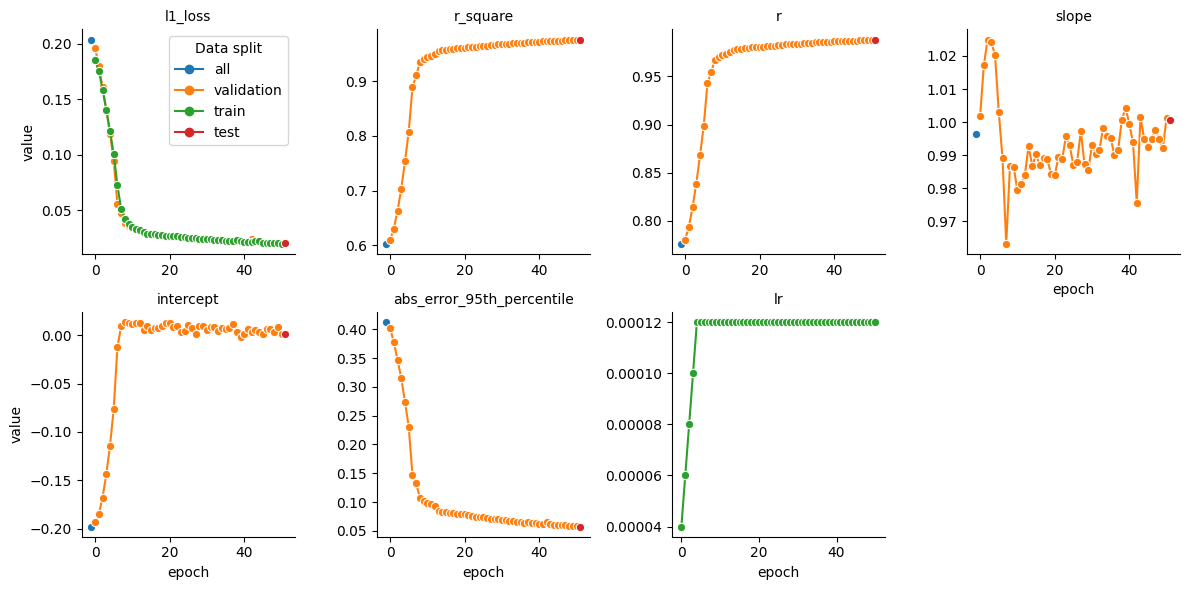

In [ ]:
# Filter the dataframe to only include 'rt' property
rt_df = transfer_stats_df[transfer_stats_df['property'].isin(['rt'])]

# Create a relational plot using seaborn
fig = sns.relplot(
    data=rt_df,
    x='epoch',
    y='value',
    hue='data_split',
    marker='o',
    dashes=False,
    col='metric_name',
    kind='line',
    col_wrap=4,
    facet_kws={'sharex': False, 'sharey': False, 'legend_out': False},
    height=3,
    aspect=1
)

# Set the title for each subplot
fig.set_titles("{col_name}")

# Set the legend title
fig.legend.set_title('Data split')

## 3. Charge prediction
To get the statistics for the charge prediction task we filter the dataframe to only include the 'charge' property.
The charge model is currently not yet pretrained. It's therefore particularly important to monitor the model performance on the validation and test set.

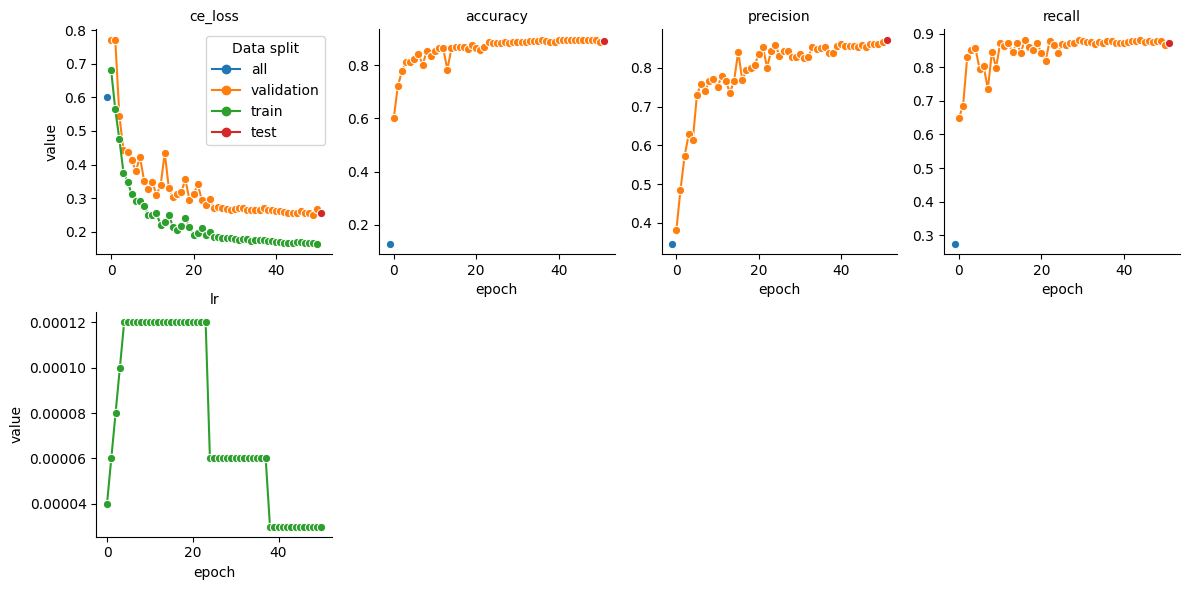

In [ ]:
# Filter the dataframe to only include 'rt' property
charge_df = transfer_stats_df[transfer_stats_df['property'].isin(['charge'])]

# Create a relational plot using seaborn
fig = sns.relplot(
    data=charge_df,
    x='epoch',
    y='value',
    hue='data_split',
    marker='o',
    dashes=False,
    col='metric_name',
    kind='line',
    col_wrap=4,
    facet_kws={'sharex': False, 'sharey': False, 'legend_out': False},
    height=3,
    aspect=1
)

# Set the title for each subplot
fig.set_titles("{col_name}")

# Set the legend title
fig.legend.set_title('Data split')

## 4. Fragmentation Spectrum (MS2) prediction
To get the statistics for the fragmentation spectrum prediction task we filter the dataframe to only include the 'ms2' property.
Please keep in mind that training and evaluation on DIA data has to deal with interference in highly chimeric spectra. The quality of predicted MS2 spectra will therefore be lower as for DDA data. To have an intereference free evaluation use the `use_for_ms2` subset in the `speclib.transfer` training data.

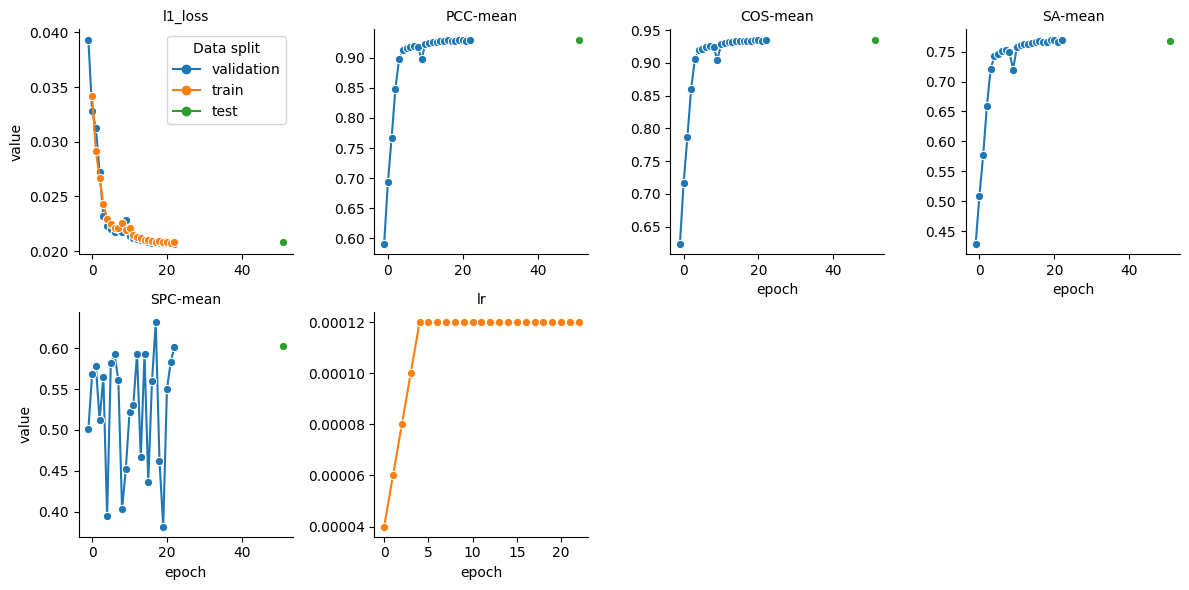

In [ ]:
# Filter the dataframe to only include 'rt' property
ms2_df = transfer_stats_df[transfer_stats_df['property'].isin(['ms2'])]

# Create a relational plot using seaborn
fig = sns.relplot(
    data=ms2_df,
    x='epoch',
    y='value',
    hue='data_split',
    marker='o',
    dashes=False,
    col='metric_name',
    kind='line',
    col_wrap=4,
    facet_kws={'sharex': False, 'sharey': False, 'legend_out': False},
    height=3,
    aspect=1
)

# Set the title for each subplot
fig.set_titles("{col_name}")

# Set the legend title
fig.legend.set_title('Data split')